[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/season_multiplicative_air_travel.ipynb)

# Multiplicative Seasonality 
By default NeuralProphet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. This time series of the number of air passengers is an example of when additive seasonality does not work:

In [1]:
%%capture capt
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

In [2]:
%%capture capt
try:
    import neuralprophet 
    import pandas
except Exception as e1:
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    try:
        import neuralprophet 
        import pandas
    except Exception as e2:
        print(e1)
        print(e2)
        capt.show()

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ourownstory/neural_prophet/master/example_data/air_passengers.csv")
set_log_level("ERROR")

In [5]:
m = NeuralProphet()
metrics = m.fit(df, freq="MS")

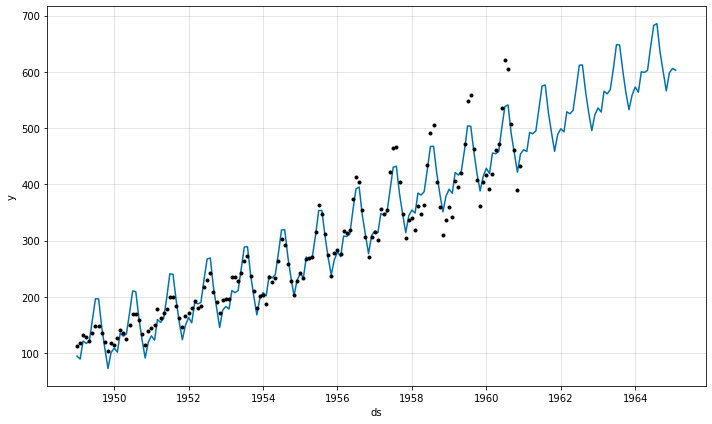

In [6]:
future = m.make_future_dataframe(df, periods=50, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_param = m.plot_parameters()

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by NeuralProphet, rather it grows with the trend. This is multiplicative seasonality.

NeuralProphet can model multiplicative seasonality by setting `seasonality_mode="multiplicative"` in the input arguments:

In [7]:
m = NeuralProphet(seasonality_mode="multiplicative")
metrics = m.fit(df, freq="MS")

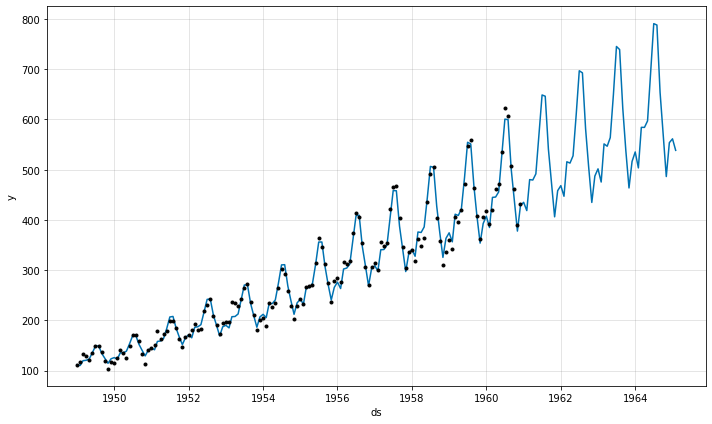

In [8]:
future = m.make_future_dataframe(df, periods=50, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_param = m.plot_parameters()

The components figure will now show the seasonality as a percent of the trend: 

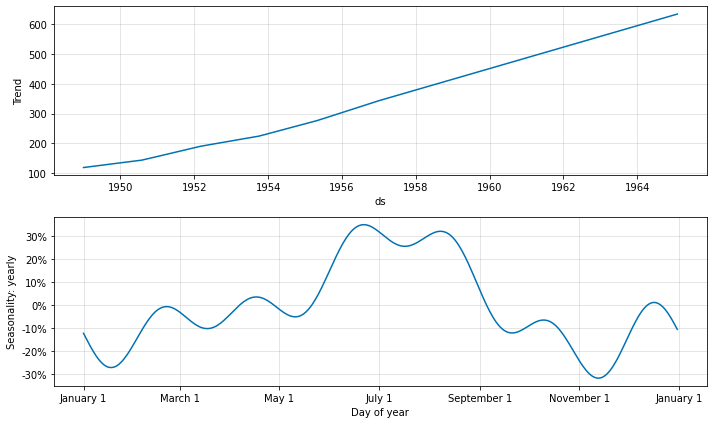

In [9]:
fig_param = m.plot_components(forecast)

Note that the seasonality is only fit on data occuring at the start of the month. Thus, the plotted values for seasonality inbetween months may take on random values. 

Setting`seasonality_mode="multiplicative"` will model all seasonalities as multiplicative, including custom seasonalities added with `add_seasonality`.